In [3]:
import pandas as pd
import numpy as np
import matplotlib; import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font',family = 'NanumGothicCoding')

In [4]:
df_raw = pd.read_csv('./data/체질검사.csv', engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_raw_x = df_raw.drop('FAT', axis=1)
df_raw_y = df_raw['FAT']
df_raw_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [6]:
df_raw_x.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,44.885,178.924,70.149,37.992,100.824,92.556,99.905,59.406,38.590,23.102,32.273,28.664,18.230
std,12.602,29.389,3.663,2.431,8.430,10.783,7.164,5.250,2.412,1.695,3.021,2.021,0.934
min,22.000,118.500,29.500,31.100,79.300,69.400,85.000,47.200,33.000,19.100,24.800,21.000,15.800
25%,35.750,159.000,68.250,36.400,94.350,84.575,95.500,56.000,36.975,22.000,30.200,27.300,17.600
50%,43.000,176.500,70.000,38.000,99.650,90.950,99.300,59.000,38.500,22.800,32.050,28.700,18.300
75%,54.000,197.000,72.250,39.425,105.375,99.325,103.525,62.350,39.925,24.000,34.325,30.000,18.800
max,81.000,363.150,77.750,51.200,136.200,148.100,147.700,87.300,49.100,33.900,45.000,34.900,21.400


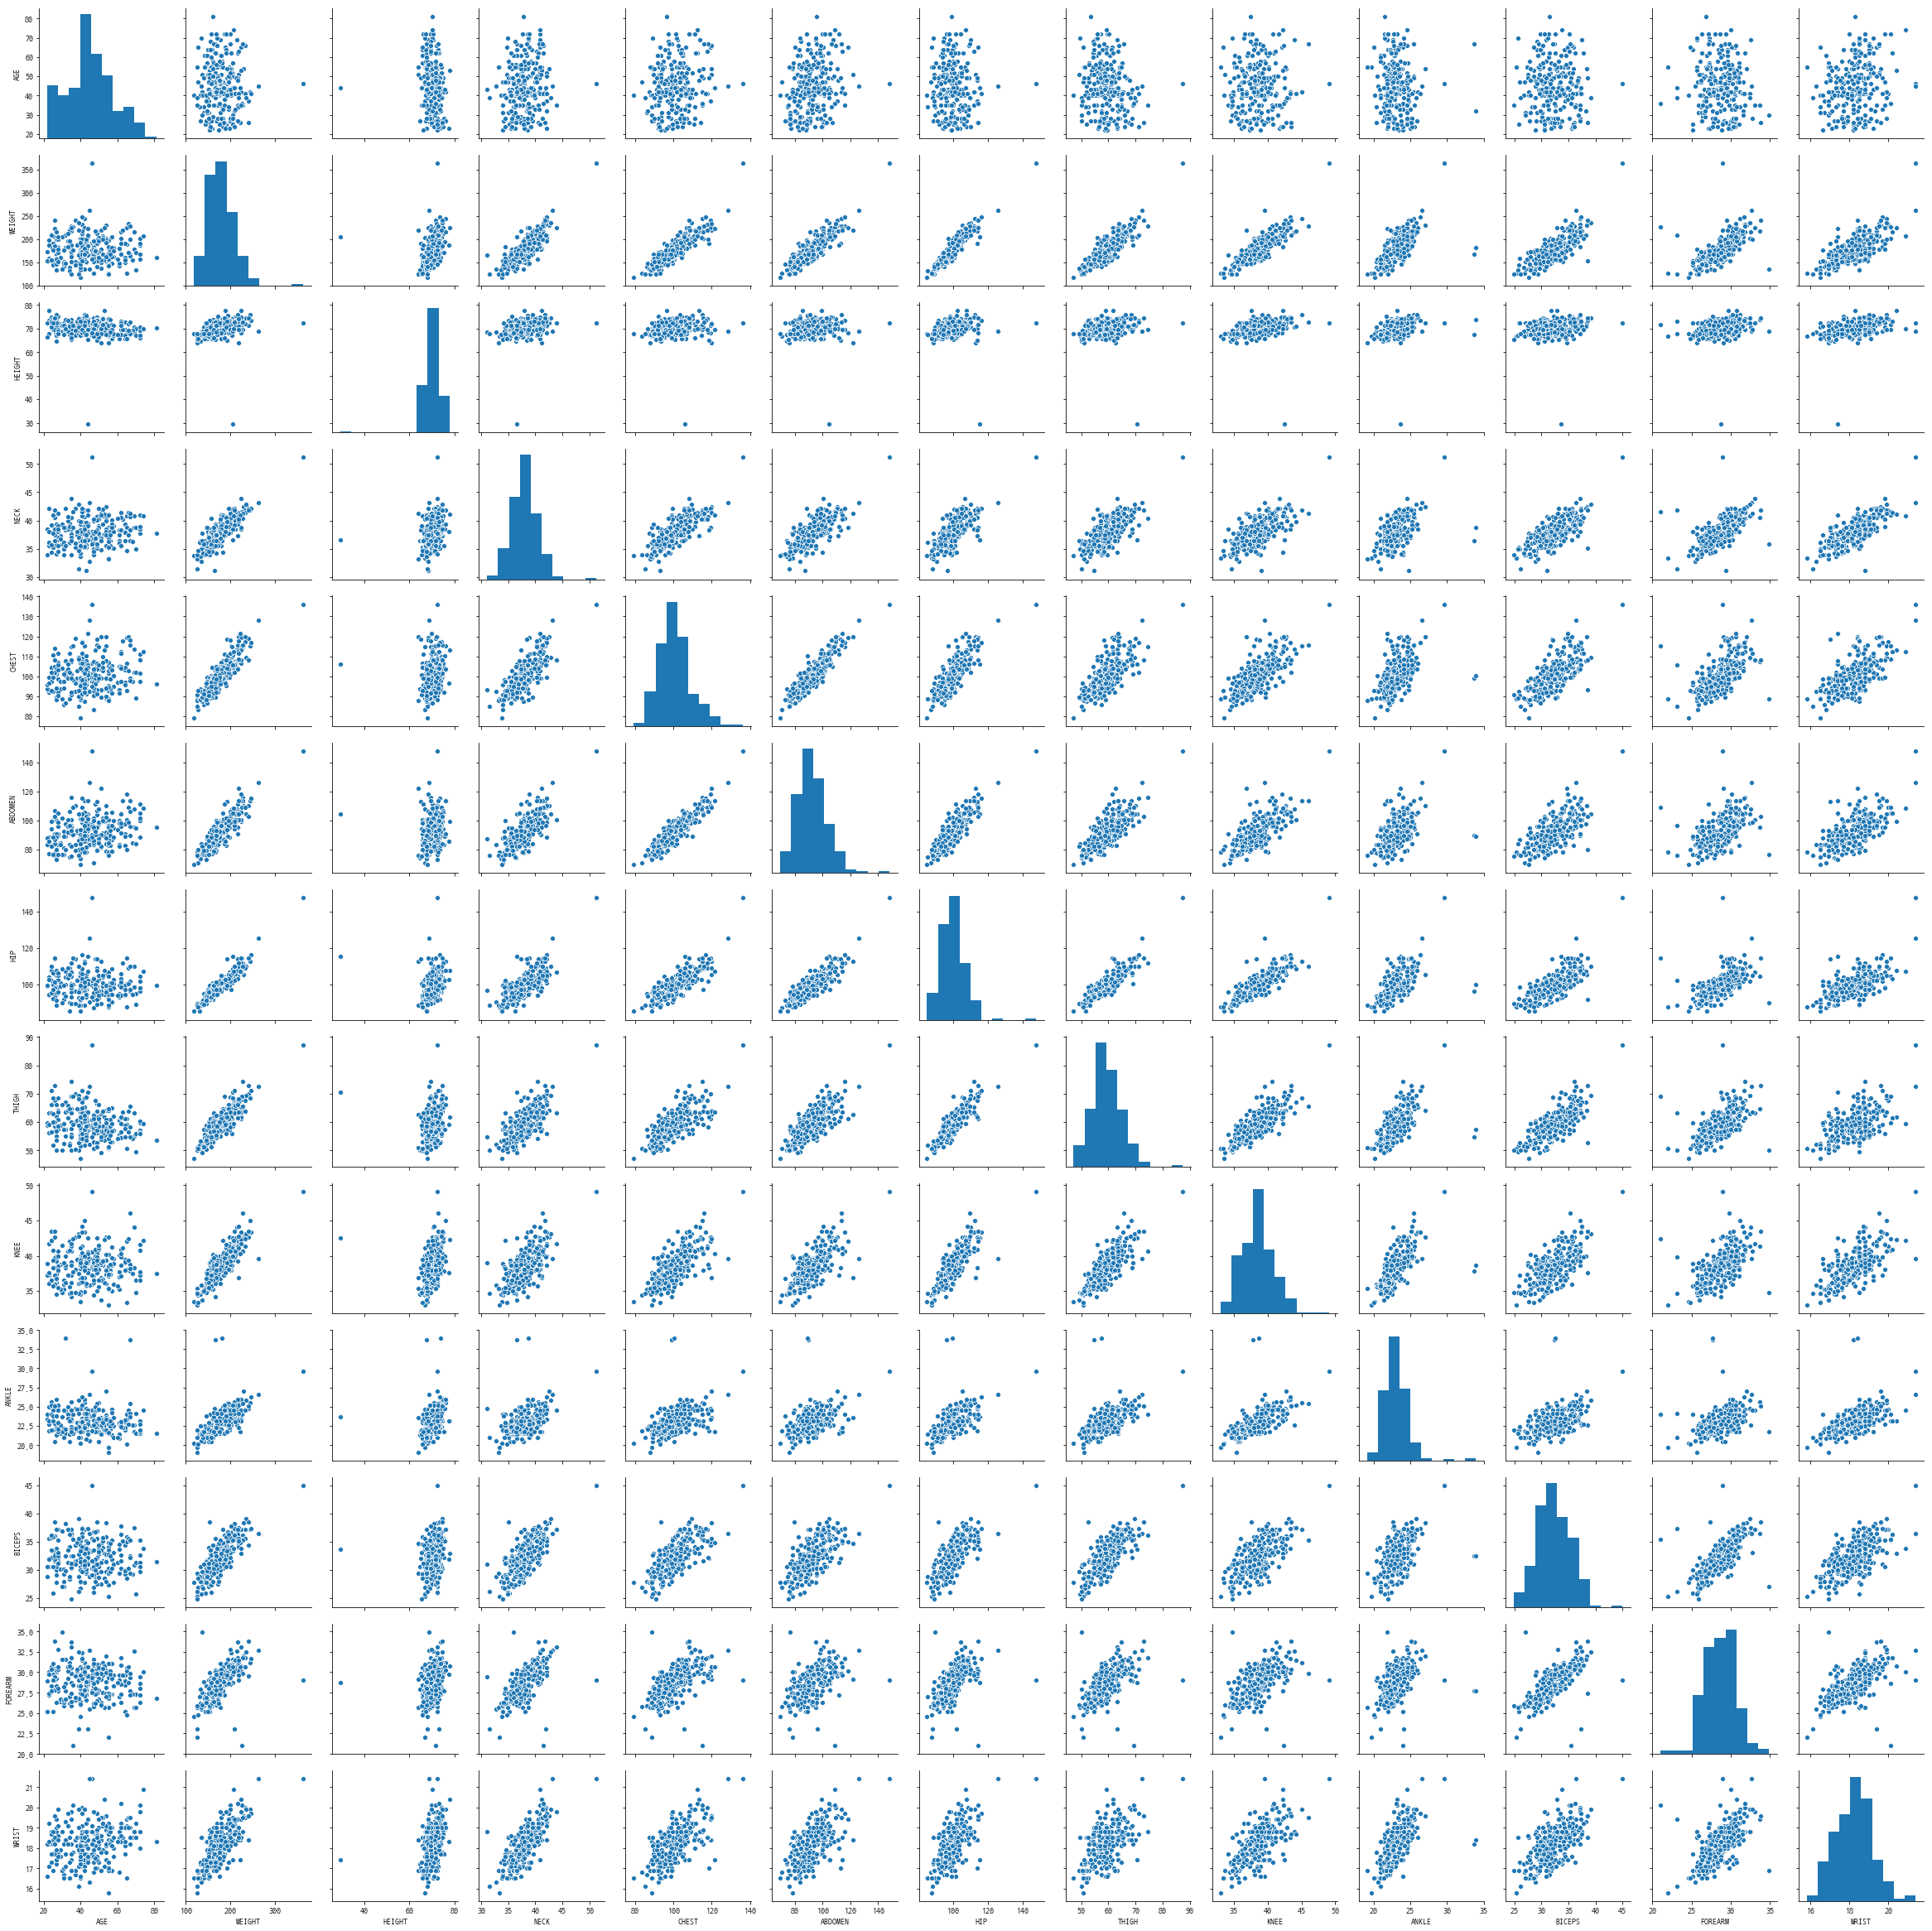

In [7]:
sns.pairplot(df_raw_x)

In [8]:
df_raw_x.corr().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
AGE,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665
ANKLE,-0.105,0.614,0.265,0.478,0.483,0.453,0.558,0.540,0.612,1.000,0.485,0.419,0.566


In [9]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print('Scaled Data : \n {}'.format(nd_scaled[:5].round(3)))
print('Shape : \n {}'.format(nd_scaled.shape))

Scaled Data : 
 [[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape : 
 (252, 13)


In [10]:
df_scaled = pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)
df_scaled.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-1.820,-2.060,-11.120,-2.841,-2.558,-2.152,-2.085,-2.330,-2.323,-2.366,-2.479,-3.800,-2.608
25%,-0.726,-0.679,-0.519,-0.656,-0.769,-0.742,-0.616,-0.650,-0.671,-0.652,-0.688,-0.676,-0.676
50%,-0.150,-0.083,-0.041,0.003,-0.140,-0.149,-0.085,-0.077,-0.038,-0.179,-0.074,0.018,0.075
75%,0.725,0.616,0.575,0.591,0.541,0.629,0.506,0.562,0.554,0.531,0.680,0.663,0.612
max,2.872,6.281,2.079,5.444,4.205,5.161,6.685,5.324,4.366,6.383,4.221,3.092,3.403


In [14]:
pca = PCA(n_components=7)
nd_pca = pca.fit_transform(df_scaled)
print('PCA Data : \n {}'.format(nd_pca[:6]))
print('Shape : \n {}'.format(nd_pca.shape))

PCA Data : 
 [[15.14078652  0.74918006  1.73038829  2.97562799 -1.20140416  1.91649244
  -0.56546582]
 [-1.25745311 -1.79805793 -0.60359147 -0.4059414   1.33324667  0.82223682
   0.17446338]
 [-0.72744205  2.31886158 -0.89209681  0.68258035 -0.50328047  0.60020938
  -0.51640079]
 [-3.21015592  1.46511228  0.45790754 -0.57563715  0.01977212 -0.17880332
   0.71687905]
 [ 3.24650172  2.29304235  1.82833929 -0.02336594 -0.40697879  1.14656798
   1.70117486]
 [ 2.16463968 -0.08372964  0.49801092 -0.72607338 -0.27416034 -0.18046851
  -0.30712439]]
Shape : 
 (252, 7)


In [16]:
df_pca = pd.DataFrame(nd_pca, columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7'])
df_pca.head()

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7
0,15.140787,0.749180,1.730388,2.975628,-1.201404,1.916492,-0.565466
1,-1.257453,-1.798058,-0.603591,-0.405941,1.333247,0.822237,0.174463
2,-0.727442,2.318862,-0.892097,0.682580,-0.503280,0.600209,-0.516401
3,-3.210156,1.465112,0.457908,-0.575637,0.019772,-0.178803,0.716879
4,3.246502,2.293042,1.828339,-0.023366,-0.406979,1.146568,1.701175


In [18]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [I for I in range(1,8)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
6,7,0.287,0.022,0.943


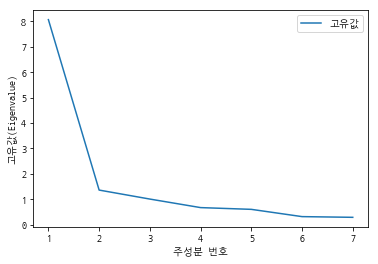

In [19]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label='고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='bset')

In [20]:
df_pca_stat.head()

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072219,0.618476,0.618476
1,2,1.360474,0.104237,0.722712
2,3,1.006311,0.077101,0.799814
3,4,0.670153,0.051346,0.851160
4,5,0.601199,0.046063,0.897222


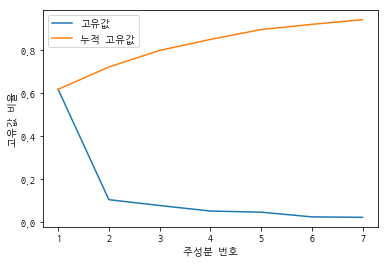

In [21]:
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['EigenValueRatio'], label = '고유값')

plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['CumEigenValueRatio'], label = '누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

In [22]:
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, 
                                                columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7
0,AGE,-0.010,-0.751,0.420,-0.079,-0.040,0.294,0.034
1,WEIGHT,-0.345,0.018,-0.039,-0.087,0.142,-0.031,-0.076
2,HEIGHT,-0.101,0.469,0.678,-0.082,0.485,0.115,-0.134
3,NECK,-0.306,-0.090,0.121,0.206,0.055,-0.561,-0.007
4,CHEST,-0.316,-0.209,-0.061,0.009,0.152,-0.070,-0.450
5,ABDOMEN,-0.312,-0.265,-0.122,-0.120,0.229,0.033,-0.295
6,HIP,-0.326,-0.003,-0.221,-0.178,0.163,0.045,0.049
7,THIGH,-0.310,0.123,-0.322,-0.077,0.096,0.062,0.273
8,KNEE,-0.308,0.050,0.001,-0.247,0.005,0.497,0.443
9,ANKLE,-0.231,0.224,0.128,-0.500,-0.679,-0.032,-0.347


,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7
Prin1,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0
Prin2,0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0
Prin4,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0
Prin5,0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0
Prin6,-0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin7,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0


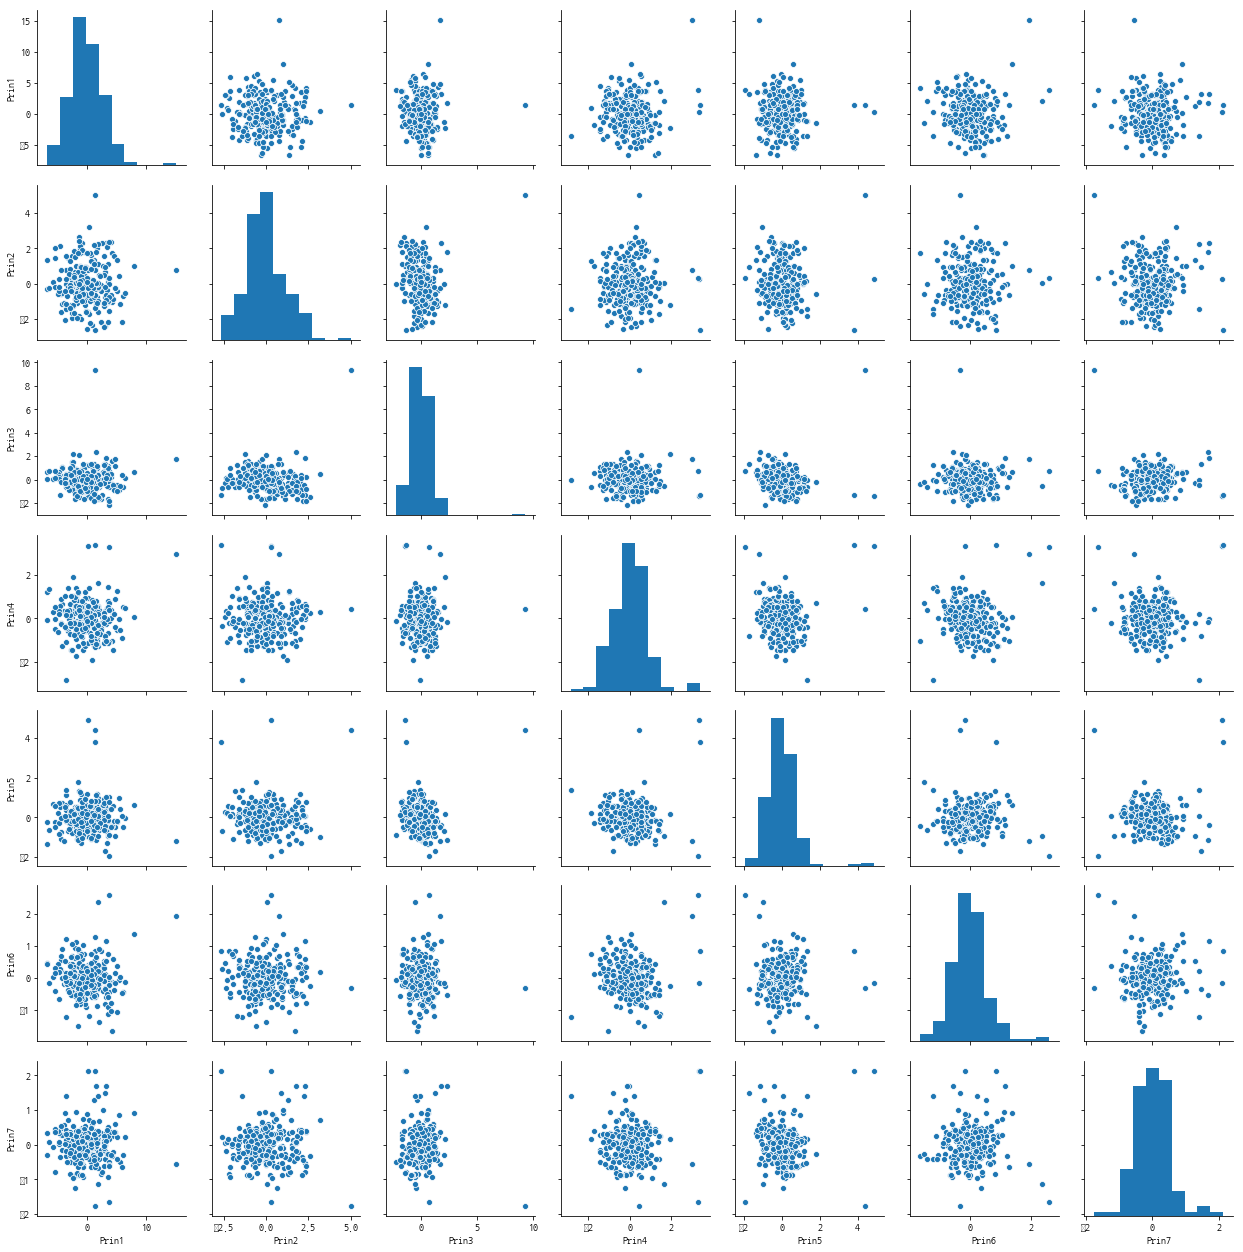

In [23]:
sns.pairplot(df_pca)
df_pca.corr().round(3)

In [24]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Fri, 10 May 2019   Prob (F-statistic):           7.72e-64
Time:                        17:06:09   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.2

In [25]:
x_var = ['Prin1', 'Prin2', 'Prin3']
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())



                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     115.9
Date:                Fri, 10 May 2019   Prob (F-statistic):           6.37e-47
Time:                        17:06:18   Log-Likelihood:                -782.06
No. Observations:                 252   AIC:                             1572.
Df Residuals:                     248   BIC:                             1586.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1508      0.342     55.958      0.0

## PCA 실습

In [35]:
df_raw = pd.read_csv('./data/IRIS.csv', engine='python')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


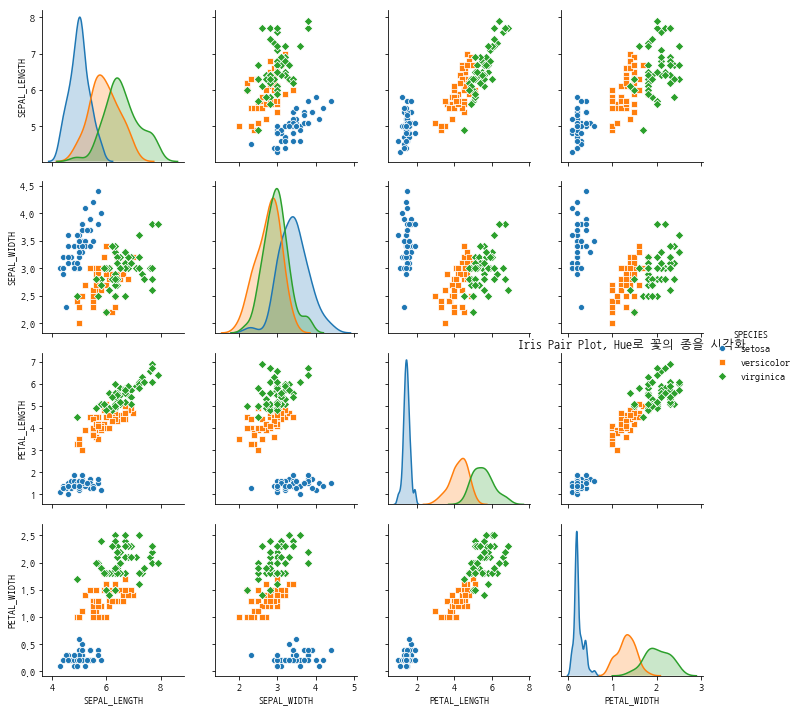

In [40]:
sns.pairplot(df_raw, hue="SPECIES", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

In [36]:
df_raw_x = df_raw.drop('SPECIES', axis=1)
df_raw_y = df_raw['SPECIES']
df_raw_x.head()
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


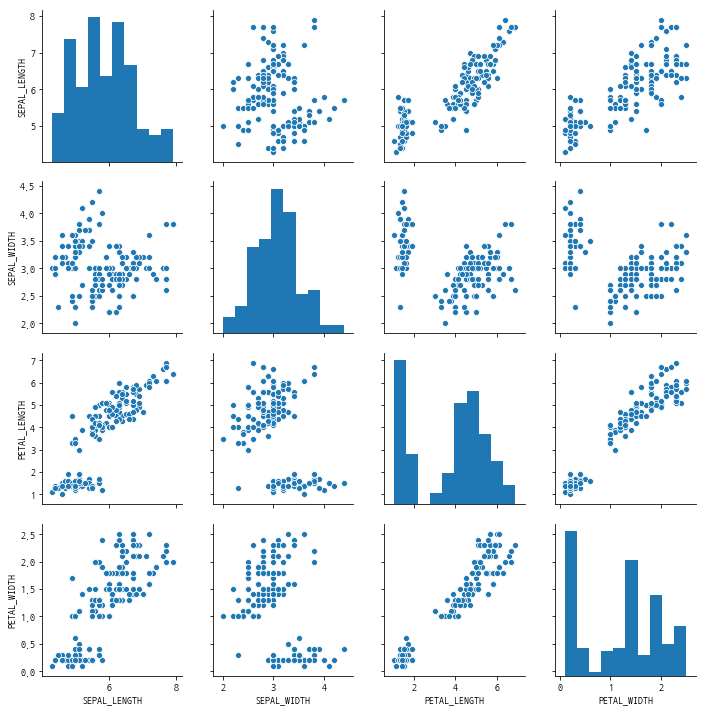

In [37]:
sns.pairplot(df_raw_x)

In [50]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print('Scaled Data : \n {}'.format(nd_scaled[:5].round(3)))
print('Shape : \n {}'.format(nd_scaled.shape))

Scaled Data : 
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape : 
 (150, 4)


In [51]:
df_scaled = pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [54]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)
print('PCA Data : \n {}'.format(nd_pca[:3]))
print('Shape : \n {}'.format(nd_pca.shape))

PCA Data : 
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]]
Shape : 
 (150, 4)


In [55]:
df_pca = pd.DataFrame(nd_pca, columns=['Prin1','Prin2','Prin3','Prin4'])
df_pca.head()

,Prin1,Prin2,Prin3,Prin4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
